# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Install the yfinance library 

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

# Define the ticker symbol for Tesla

In [ ]:

ticker_symbol = 'TSLA'

# Fetch the data

In [5]:

tesla_data = yf.Ticker(ticker_symbol)

In [6]:

historical_data = tesla_data.history(period='10y')

# Display the historical data

In [21]:
print("Historical Stock Prices for TSLA:")
print(historical_data)

Historical Stock Prices for TSLA:
                                 Open        High         Low       Close  \
Date                                                                        
2015-02-27 00:00:00-05:00   13.793333   13.903333   13.520000   13.556000   
2015-03-02 00:00:00-05:00   13.513333   13.556000   13.055333   13.155333   
2015-03-03 00:00:00-05:00   13.120667   13.349333   13.021333   13.304000   
2015-03-04 00:00:00-05:00   13.283333   13.501333   13.147333   13.496000   
2015-03-05 00:00:00-05:00   13.523333   13.746000   13.343333   13.375333   
...                               ...         ...         ...         ...   
2025-02-20 00:00:00-05:00  361.510010  362.299988  348.000000  354.399994   
2025-02-21 00:00:00-05:00  353.440002  354.980011  334.420013  337.799988   
2025-02-24 00:00:00-05:00  338.140015  342.399994  324.700012  330.529999   
2025-02-25 00:00:00-05:00  327.019989  328.890015  297.250000  302.799988   
2025-02-26 00:00:00-05:00  303.709991  309

In [28]:
TSLA_info = tesla_data.info


In [29]:

print(TSLA_info)

{'address1': '1 Tesla Road', 'city': 'Austin', 'state': 'TX', 'zip': '78725', 'country': 'United States', 'phone': '512 516 8177', 'website': 'https://www.tesla.com', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a n

In [34]:
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-02-27 00:00:00-05:00,13.793333,13.903333,13.520000,13.556000,58231500,0.0,0.0
2015-03-02 00:00:00-05:00,13.513333,13.556000,13.055333,13.155333,118831500,0.0,0.0
2015-03-03 00:00:00-05:00,13.120667,13.349333,13.021333,13.304000,66484500,0.0,0.0
2015-03-04 00:00:00-05:00,13.283333,13.501333,13.147333,13.496000,63330000,0.0,0.0
2015-03-05 00:00:00-05:00,13.523333,13.746000,13.343333,13.375333,73155000,0.0,0.0


In [35]:
import matplotlib.pyplot as plt

In [36]:
dividends = tesla_data.dividends
print(dividends)

Series([], Name: Dividends, dtype: float64)


# Check Basic Statistics and Data Types

In [44]:

print(historical_data.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-02-27 00:00:00-05:00 to 2025-02-26 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2515 non-null   float64
 1   High          2515 non-null   float64
 2   Low           2515 non-null   float64
 3   Close         2515 non-null   float64
 4   Volume        2515 non-null   int64  
 5   Dividends     2515 non-null   float64
 6   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB
None


In [45]:
print(historical_data.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [46]:
print(historical_data.describe())

              Open         High          Low        Close        Volume  \
count  2515.000000  2515.000000  2515.000000  2515.000000  2.515000e+03   
mean    121.164826   123.826077   118.292377   121.102992  1.123459e+08   
std     118.094231   120.733068   115.129785   117.938093  7.395841e+07   
min       9.488000    10.331333     9.403333     9.578000  1.062000e+07   
25%      17.547000    17.818334    17.240001    17.546667  6.716600e+07   
50%      38.379333    39.633331    37.205334    38.146667  9.288270e+07   
75%     224.748337   229.980003   219.049995   224.508339  1.297030e+08   
max     475.899994   488.540009   457.510010   479.859985  9.140820e+08   

       Dividends  Stock Splits  
count     2515.0   2515.000000  
mean         0.0      0.003181  
std          0.0      0.116250  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      5.000000  


# Handle Missing Values

In [56]:
print(historical_data.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


# Calculate Z-scores and Identify outliers

In [62]:
from scipy import stats


historical_data['Z-Score'] = stats.zscore(historical_data['Close'])

outliers_z = historical_data[(historical_data['Z-Score'] > 3) | (historical_data['Z-Score'] < -3)]

print(outliers_z)

                                 Open       High        Low       Close  \
Date                                                                      
2024-12-17 00:00:00-05:00  475.899994  483.98999  457.51001  479.859985   

                              Volume  Dividends  Stock Splits   Z-Score  
Date                                                                     
2024-12-17 00:00:00-05:00  131223000        0.0           0.0  3.042514  


# Box plot for visualizing outliers

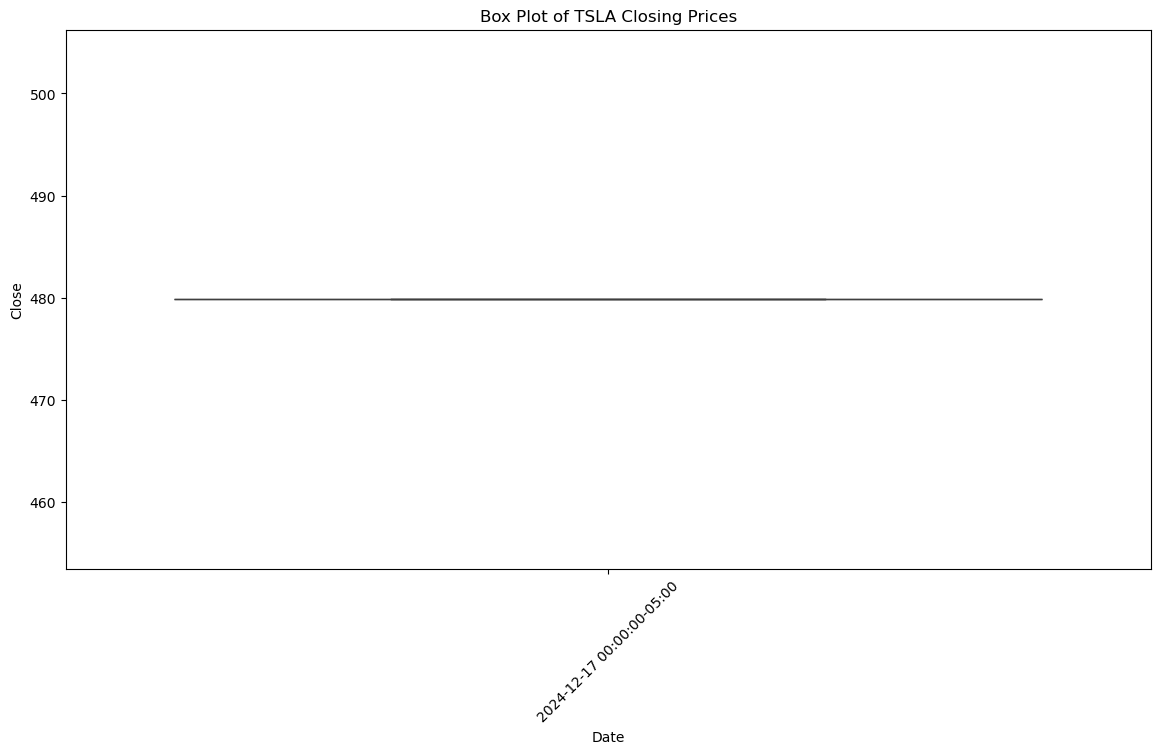

In [61]:


plt.figure(figsize=(14, 7))

sns.boxplot(x=outliers_z.index, y='Close', data=outliers_z)
plt.title('Box Plot of TSLA Closing Prices')
plt.xticks(rotation=45)
plt.show()